# Вариант 1

## Utils

In [141]:
import typing

import sympy

In [142]:
def gaussian_elimination(matrix: sympy.Matrix) -> sympy.Matrix:
    # Maybe does not cover all cases, but works well enough for me
    for col in range(min(matrix.shape[0], matrix.shape[1])):
        if matrix[col, col] == 0:
            for row in range(col + 1, matrix.shape[0]):
                matrix[col, :] += matrix[row, :]
        if matrix[col, col] == 0:
            continue
        for row in range(matrix.shape[0]):
            if row == col:
                continue
            matrix[row, :] -= matrix[col, :] * matrix[row, col] / matrix[col, col]
        matrix[col, :] /= matrix[col, col]
    return matrix

In [143]:
def vec_norm(vec: sympy.Matrix, p: int = 2) -> float:
    if p == sympy.oo: return sympy.Max(*sympy.Abs(vec))
    res = 0
    for item in vec: res += sympy.Abs(item ** p)
    return sympy.root(res, p)

# Simple tests
test_vec = sympy.Matrix([ 1, 2, -3 ])
assert vec_norm(test_vec, 1) == 6
assert vec_norm(test_vec, 2) == sympy.sqrt(14)
assert vec_norm(test_vec, sympy.oo) == 3

In [144]:
def mat_norm(mat: sympy.Matrix, p: int = 2) -> float:
    match p:
        case 1:
            return max(*[ sum(sympy.Abs(mat).col(i)) for i in range(mat.cols) ])
        case 2:
            gramm = mat.T @ mat
            x = sympy.Symbol('x')
            charpoly = gramm - x * sympy.eye(gramm.shape[0])
            eigenvals = sympy.solve(charpoly.det())
            max_eigenval = max(*eigenvals)
            return sympy.sqrt(max_eigenval)
        case sympy.oo:
            return max(*[ sum(sympy.Abs(mat).row(i)) for i in range(mat.rows) ])
        case 'F':
            return sympy.sqrt(sum(mat.applyfunc(lambda item: item ** 2)))
        case _:
            raise NotImplemented

# Simple tests
test_mat = sympy.Matrix([ [ 1, -2 ], [ 3, -4 ] ])
assert mat_norm(test_mat, 1) == 6
assert mat_norm(test_mat, 2) == sympy.sqrt(15 + sympy.sqrt(221))
assert mat_norm(test_mat, sympy.oo) == 7
assert mat_norm(test_mat, 'F') == sympy.sqrt(30)

In [145]:
def svd(
    A: sympy.Matrix,
    max_singvals: int = 1000000000,
    eq: bool = False
) -> typing.Union[sympy.Equality, typing.Tuple[sympy.Matrix, sympy.Matrix, sympy.Matrix]]:
    eigen = [ ]
    for eigenval, _, eigenvects in (A.T @ A).eigenvects():
        if eigenval == 0: continue
        assert len(eigenvects) == 1
        eigen.append((eigenval, eigenvects[0]))
    eigen.sort(key = lambda tup: tup[0], reverse = True)
    eigen = eigen[:max_singvals]

    U, S, V = sympy.Matrix(), sympy.Matrix(), sympy.Matrix()
    for (eigenval, eigenvect) in eigen:
        singval = sympy.sqrt(eigenval)
        S = sympy.Matrix.hstack(S, sympy.Matrix([ singval ]))
        V = sympy.Matrix.hstack(V, eigenvect / vec_norm(eigenvect))
        u = (A @ eigenvect) / singval
        U = sympy.Matrix.hstack(U, u / vec_norm(u))
    S = sympy.diag(*S)
    
    if not eq: return U, S, V
    return sympy.Eq(A, sympy.MatMul(U, S, sympy.Transpose(V)), evaluate = False)

# Simple test
test_mat = sympy.Matrix([ [ 1, -2 ], [ 3, -4 ] ])
display(svd(test_mat, eq = True))
U, S, V = svd(test_mat)
assert sympy.simplify(U @ S @ V - test_mat) == sympy.zeros(*test_mat.shape)

Eq(Matrix([
[1, -2],
[3, -4]]), Matrix([
[  (-23/14 - sqrt(221)/14)/(sqrt(sqrt(221) + 15)*sqrt((sqrt(221)/14 + 23/14)**2/(sqrt(221) + 15) + (41/14 + 3*sqrt(221)/14)**2/(sqrt(221) + 15))),   (-23/14 + sqrt(221)/14)/(sqrt(15 - sqrt(221))*sqrt((41/14 - 3*sqrt(221)/14)**2/(15 - sqrt(221)) + (23/14 - sqrt(221)/14)**2/(15 - sqrt(221))))],
[(-3*sqrt(221)/14 - 41/14)/(sqrt(sqrt(221) + 15)*sqrt((sqrt(221)/14 + 23/14)**2/(sqrt(221) + 15) + (41/14 + 3*sqrt(221)/14)**2/(sqrt(221) + 15))), (-41/14 + 3*sqrt(221)/14)/(sqrt(15 - sqrt(221))*sqrt((41/14 - 3*sqrt(221)/14)**2/(15 - sqrt(221)) + (23/14 - sqrt(221)/14)**2/(15 - sqrt(221))))]])*Matrix([
[sqrt(sqrt(221) + 15),                    0],
[                   0, sqrt(15 - sqrt(221))]])*Matrix([
[(5/14 - sqrt(221)/14)/sqrt((5/14 - sqrt(221)/14)**2 + 1), (5/14 + sqrt(221)/14)/sqrt(1 + (5/14 + sqrt(221)/14)**2)],
[                    1/sqrt((5/14 - sqrt(221)/14)**2 + 1),                     1/sqrt(1 + (5/14 + sqrt(221)/14)**2)]]).T)

In [146]:
def cond(mat: sympy.Matrix, norm_p: int) ->  float:
    return mat_norm(mat, norm_p) * mat_norm(mat.inv(), norm_p)

# Simple test
test_mat = sympy.Matrix([ [ 1, 0.99 ], [ 1, -1.01 ] ])
assert cond(test_mat, 1) == 2.01

## Задача 1

![Alternative Text][1702826821346]

[1702826821346]: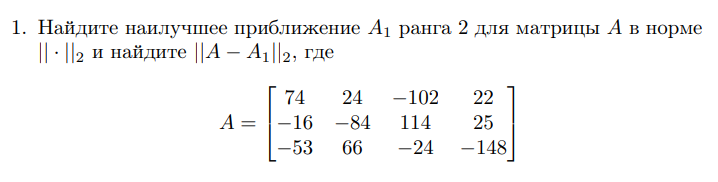

In [147]:
A = sympy.Matrix([
    [ 74, 24, -102, 22 ],
    [ -16, -84, 114, 25 ],
    [ -53, 66, -24, -148 ]
])
display(svd(A, eq = True))

Eq(Matrix([
[ 74,  24, -102,   22],
[-16, -84,  114,   25],
[-53,  66,  -24, -148]]), Matrix([
[-1/3,  2/3, -2/3],
[ 2/3, -1/3, -2/3],
[-2/3, -2/3, -1/3]])*Matrix([
[198,   0,  0],
[  0, 165,  0],
[  0,   0, 33]])*Matrix([
[    0,  6/11, -7/11],
[-6/11,     0,  6/11],
[ 7/11, -6/11,     0],
[ 6/11,  7/11,  6/11]]).T)

Так как норма $||\cdot||_2$ является унитарно-инвариантной, по теореме Экхарта-Янга-Мирского наилучшим приближением ранга 2 для матрицы A в этой норме является матрица A1, полученная из сингулярного разложения матрицы A путём обнуления меньших сингулярных значений. Величина $||A - A_1||_2$ при этом равна наибольшему удалённому сингулярному значению, то есть 33.

In [148]:
display(svd(A, 2, eq = True))
U, S, V = svd(A, 2)
A1 = U @ S @ V.T
display(A1)

Eq(Matrix([
[ 74,  24, -102,   22],
[-16, -84,  114,   25],
[-53,  66,  -24, -148]]), Matrix([
[-1/3,  2/3],
[ 2/3, -1/3],
[-2/3, -2/3]])*Matrix([
[198,   0],
[  0, 165]])*Matrix([
[    0,  6/11],
[-6/11,     0],
[ 7/11, -6/11],
[ 6/11,  7/11]]).T)

Matrix([
[ 60,  36, -102,   34],
[-30, -72,  114,   37],
[-60,  72,  -24, -142]])

Убедимся, что матрица действительно ранга 2, а величина нормы действительно 33.

In [149]:
display(A1)
print('Rank A1:', A1.rank())
print('Norm |A - A1|:', mat_norm(A - A1, 2))

Matrix([
[ 60,  36, -102,   34],
[-30, -72,  114,   37],
[-60,  72,  -24, -142]])

Rank A1: 2
Norm |A - A1|: 33


## Задача 2

![Alternative Text][1702826836229]

[1702826836229]: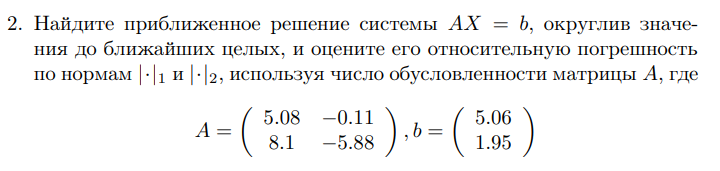

In [150]:
A = sympy.Matrix([ [ 5.08, -0.11 ], [ 8.1, -5.88 ] ])
b = sympy.Matrix([ 5.06, 1.95 ])

rounded_A = sympy.Matrix([ [ 5, 0 ], [ 8, -6 ] ])
rounded_b = sympy.Matrix([ 5, 2 ])

Найдём решение округлённой системы с помощью обратной матрицы: $AX = b \Rightarrow X = A^{-1}b$

In [151]:
display(rounded_A.inv() @ rounded_b)

Matrix([
[1],
[1]])

Оценим относительную погрешность полученного решения по доказанной формуле $\delta x \leq \dfrac{\chi(A)}{1 - \chi(A) \delta A} (\delta A + \delta b)$,
где $\delta A = \dfrac{||\hat{A} - A||}{||A||}$, $\delta b = \dfrac{|\hat{b} - b|}{|b|}$, $\chi(A) = ||A|| \cdot ||A^{-1}||$
Так как известны точные значения $A$ и $b$, для оценки относительной погрешности будем использовать их, а не приближённые величины.

In [152]:
def estimate_error(
    A: sympy.Matrix, dA: sympy.Matrix,
    b: sympy.Matrix, db: sympy.Matrix,
    norm_p: int
) -> float:
    errA = mat_norm(dA, norm_p) / mat_norm(A, norm_p)
    errb = vec_norm(db, norm_p) / vec_norm(b, norm_p)
    chi = cond(A, norm_p)
    return ((chi / (1 - chi * errA)) * (errA + errb)).evalf()

In [153]:
print("Norm 1:", estimate_error(A, rounded_A - A, b, rounded_b - b, 1))
print("Norm 2:", estimate_error(A, rounded_A - A, b, rounded_b - b, 2))

Norm 1: 0.237025587905228
Norm 2: 0.129514184694442


## [TODO] Задача 3

![Alternative Text][1702826850278]

[1702826850278]: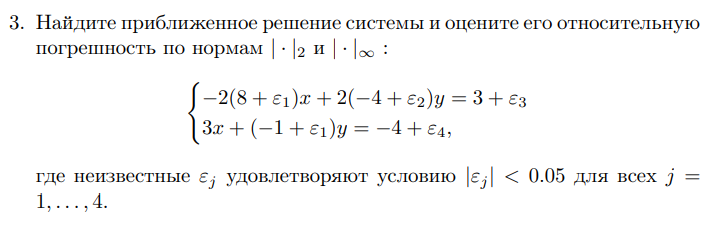

In [162]:
eps1, eps2, eps3, eps4 = sympy.symbols('epsilon_1 epsilon_2 epsilon_3 epsilon_4', real = True)
A = sympy.Matrix([ [ -2 * (8 + eps1), 2 * (-4 + eps2) ], [ 3, (-1 + eps1) ] ])
b = sympy.Matrix([ 3 + eps3, -4 + eps4 ])
display(A)
display(b)

Matrix([
[-2*epsilon_1 - 16, 2*epsilon_2 - 8],
[                3,   epsilon_1 - 1]])

Matrix([
[epsilon_3 + 3],
[epsilon_4 - 4]])

Для нахождения приближенного решения системы будем считать $\varepsilon_i = 0$

In [163]:
A_hat = A.subs({ eps1: 0, eps2: 0, eps3: 0, eps4: 0 })
b_hat = b.subs({ eps1: 0, eps2: 0, eps3: 0, eps4: 0 })
display(A_hat)
display(b_hat)

Matrix([
[-16, -8],
[  3, -1]])

Matrix([
[ 3],
[-4]])

Найдем приблженное решение системы с помощью обратной матрицы.

In [164]:
display(A_hat.inv() @ b_hat)

Matrix([
[-7/8],
[11/8]])

По доказанному, относительную погрешность такого приближения можно оценить по формуле $\delta x \leq \dfrac{\chi(A)}{1 - \chi(A) \delta A} (\delta A + \delta b)$, где $\delta A = \dfrac{||\hat{A} - A||}{||A||}$, $\delta b = \dfrac{|\hat{b} - b|}{|b|}$, $\chi(A) = ||A|| \cdot ||A^{-1}||$. \
Так как точные значения $A$ и $b$ неизвестны, будем оценивать погрешность приближенно: $\delta x \lesssim \dfrac{\chi(\hat{A})}{1 - \chi(\hat{A}) \delta \hat{A}} (\delta \hat{A} + \delta \hat{b})$, где $\chi(\hat{A}) = ||\hat{A}|| \cdot ||\hat{A}^{-1}||$, $\delta \hat{A} = \dfrac{||\Delta A||}{||\hat{A}||}$, $\delta \hat{b} = \dfrac{||\Delta b||}{||\hat{b}||}$, а $\Delta A$, $\Delta b$ - матрицы абсолютных погрешностей значений $\hat{A}$ и $\hat{b}$ соответственно. Из условия, $\Delta A = \begin{pmatrix} 2\varepsilon_{1} & -2\varepsilon_{2} \\ 0 & -\varepsilon_{1} \end{pmatrix}$, $\Delta b = \begin{pmatrix} -\varepsilon_{3} \\ -\varepsilon_{4} \end{pmatrix}$, где $|\varepsilon_{i}| \leq 0.05$

In [165]:
dA = A_hat - A
db = b_hat - b
display(dA)
display(db)

Matrix([
[2*epsilon_1, -2*epsilon_2],
[          0,   -epsilon_1]])

Matrix([
[-epsilon_3],
[-epsilon_4]])

### По норме $|\cdot|_2$

$|\Delta b|_2 = \sqrt{(-\varepsilon_{3})^2 + (-\varepsilon_{4})^2} = \sqrt{\varepsilon_{3}^2 + \varepsilon_{4}^2} \in [\sqrt{0^2 + 0^2}; \sqrt{0.05^2 + 0.05^2}] = [0; 0.05 \sqrt{2}]$ \
 \
Для упрощения вычислений в качестве матричной нормы будем использовать Фробениусову норму $||\cdot||_F$. Известно, что она, как и $||\cdot||_2$, согласована с векторной нормой $|\cdot|_2$ и $||\cdot||_2 \leq ||\cdot||_F$ \
$||\Delta A||_2 \leq ||\Delta A||_F = \sqrt{(2\varepsilon_{1})^2 + (-2\varepsilon_{2})^2 + (0)^2 + (-\varepsilon_{1})^2} = \sqrt{5\varepsilon_{1}^2 + 4\varepsilon_{2}^2} \in [\sqrt{5 \cdot 0^2 + 4 \cdot 0^2}; \sqrt{5 \cdot 0.05^2 + 4 \cdot 0.05^2}] = [0; 0.15]$ \
 \
Пусть $x = ||\Delta A||_F \in [0; 0.15]$, $y = |\Delta b|_2 \in [0; 0.05 \sqrt{2}]$.

(-sqrt(330)*x - 66*y)/(sqrt(330)*x - 40)

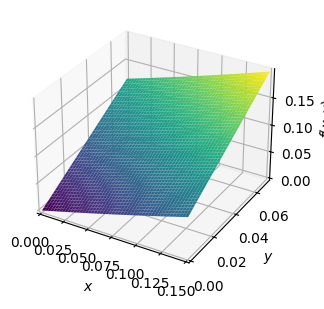

In [187]:
x, y = sympy.symbols('x y')
errA = x / mat_norm(A_hat, 'F')
errb = y / vec_norm(b_hat, 2)
chi = cond(A_hat, 'F')
error = (chi / (1 - chi * errA)) * (errA + errb)
display(error.simplify())
sympy.plotting.plot3d(error, (x, 0, 0.15), (y, 0, 0.05 * sympy.sqrt(2)), size = (3, 3))

In [190]:
error.subs({ x: 0.15, y: 0.05 * sympy.sqrt(2) }).evalf()

0.198303617244800

Следовательно, $\delta x \lesssim \dfrac{-\sqrt{330}x - 66y}{\sqrt{330}x-40}$

Следовательно, $\delta A^{-1} \lesssim -\dfrac{17x}{17x - 35} = -\dfrac{(17x - 35) + 35}{17x - 35} = -1 - \dfrac{35}{17x - 35} \leq -1 - \dfrac{35}{17 \cdot 0.02 - 35} \lesssim 0.00981$

## Задача 4

![Alternative Text][1702826869654]

[1702826869654]: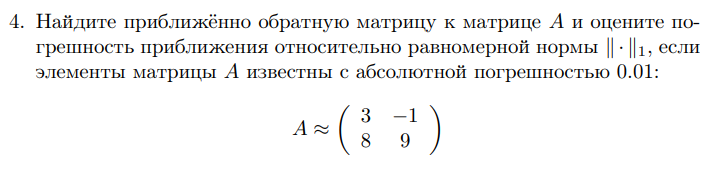

In [92]:
A_hat = sympy.Matrix([ [ 3, -1 ], [ 8, 9 ] ])

В качестве приближения матрицы, обратной к A, можно считать обратную к $\hat{A}$.

In [93]:
A_hat.inv()

Matrix([
[ 9/35, 1/35],
[-8/35, 3/35]])

По доказанному, относительную погрешность такого приближения можно оценить по формуле $\delta A^{-1} \leq \dfrac{\chi(A) \delta A}{1 - \chi(A) \delta A}$, где $\delta A = \dfrac{||\hat{A} - A||}{||A||}$. \
Так как точное значение $A$ неизвестно, будем оценивать погрешность приближенно: $\delta A^{-1} \lesssim \dfrac{\chi(\hat{A}) \delta \hat{A}}{1 - \chi(\hat{A}) \delta \hat{A}}$, где $\delta \hat{A} = \dfrac{||B||}{||\hat{A}||}$, а $B$ - матрица абсолютных погрешностей значений $\hat{A}$: $|B_{ij}| \leq 0.01$. \
Если $B = \begin{pmatrix}
    \varepsilon_{1} & \varepsilon_{2} \\
    \varepsilon_{3} & \varepsilon_{4}
\end{pmatrix}$, где $|\varepsilon_{i}| \leq 0.01$, то без ограничения общности можно считать, что $||B||_1 \in [\varepsilon_{1} + \varepsilon_{3}; \varepsilon_{2} + \varepsilon_{4}] \subseteq [0 + 0; 0.01 + 0.01] = [0; 0.02]$. Пусть $x = ||B||_1 \in [0; 0.02]$

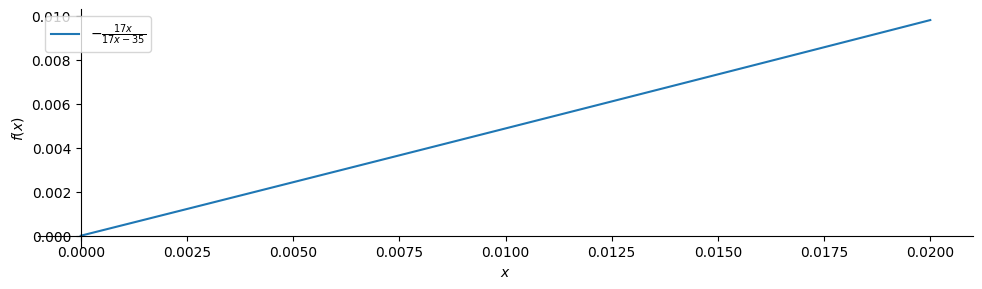

In [94]:
x = sympy.Symbol('x')
error_A_hat = x / mat_norm(A_hat, 1)
error = (cond(A_hat, 1) * error_A_hat) / (1 - cond(A_hat, 1) * error_A_hat)
sympy.plot(error.simplify(), (x, 0, 0.02), size = (10, 3), legend = True)

In [95]:
error.subs({ x: 0.02 })

0.00980957876514714

Следовательно, $\delta A^{-1} \lesssim -\dfrac{17x}{17x - 35} = -\dfrac{(17x - 35) + 35}{17x - 35} = -1 - \dfrac{35}{17x - 35} \leq -1 - \dfrac{35}{17 \cdot 0.02 - 35} \lesssim 0.00981$

## Задача 5

![Alternative Text][1702826886965]

[1702826886965]: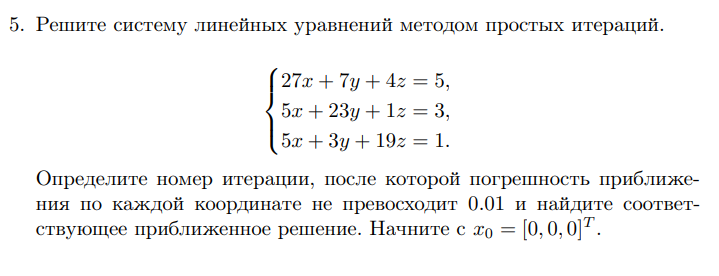

In [112]:
A = sympy.Matrix([
    [ 27, 7, 4 ],
    [ 5, 23, 1 ],
    [ 5, 3, 19 ]
])
b = sympy.Matrix([ 5, 3, 1 ])

Видно, что A - матрица с диагональным преобраладанием. Следовательно, для решения применим метод Якоби. \
 \
Требуется, чтобы абсолютная погрешность приближения по каждой координате на превосходила $0.01$, то есть если $\hat{x}$ - приближённое решение, $x$ - точное решение, то должно быть верно, что $max|\hat{x}_i - x_i| \leq 0.01$. То есть, $|\hat{x} - x|_{\infty} \leq 0.01$. \
По доказанному, $|\hat{x}_k - x|_{\infty} \leq \dfrac{|x_{k + 1} - x_{k}|_\infty}{1 - ||P||_{\infty}}$. Следовательно, вычисления можно остановить, как только выполнится условие $\dfrac{|x_{k + 1} - x_{k}|_\infty}{1 - ||P||_{\infty}} \leq 0.01$

In [113]:
def calculate_error(x: sympy.Matrix, P: sympy.Matrix, B: sympy.Matrix) -> float:
    next_x = P @ x + B
    num = vec_norm(next_x - x, sympy.oo)
    denom = (1 - mat_norm(P, sympy.oo))
    return (num / denom).evalf()

In [114]:
D = A - A.lower_triangular(-1) - A.upper_triangular(1)
P = D.inv() @ (D - A)
B = D.inv() @ b

x = sympy.zeros(3, 1)
print('Iteration 0, Error: {}'.format(calculate_error(x, P, B)))

iteration = 0
while True:
    iteration += 1
    x = (P @ x + B).evalf()
    error = calculate_error(x, P, B)
    print('Iteration {}, Error: {}'.format(iteration, error))
    if error <= 0.01: break
display(x)

Iteration 0, Error: 0.319865319865320
Iteration 1, Error: 0.119748206704728
Iteration 2, Error: 0.0367930512858049
Iteration 3, Error: 0.0129716671685962
Iteration 4, Error: 0.00433942275365829


Matrix([
[    0.15912828403027],
[  0.0945506054275889],
[-0.00653748404255904]])

## Задача 6 [TODO: не транспонировать]

![Alternative Text][1702826898142]

[1702826898142]: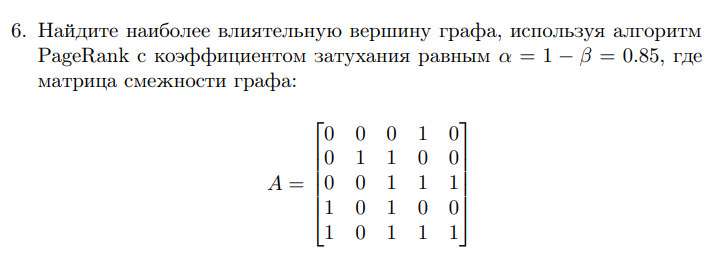

In [115]:
A = sympy.Matrix([
    [ 0, 0, 0, 1, 0 ],
    [ 0, 1, 1, 0, 0 ],
    [ 0, 0, 1, 1, 1 ],
    [ 1, 0, 1, 0, 0 ],
    [ 1, 0, 1, 1, 1 ]
])

Во-первых, переведём матрицу смежностей в матрицу вероятностей $P$ так, что $p_{ij}$ - вероятность перехода со страницы $j$ на страницу $i$. Таким образом, $P$ - стохастическая справа матрица.

In [116]:
P = A.T
for i in range(0, P.shape[0]):
    P[:, i] /= sum(P[:, i])
P

Matrix([
[0,   0,   0, 1/2, 1/4],
[0, 1/2,   0,   0,   0],
[0, 1/2, 1/3, 1/2, 1/4],
[1,   0, 1/3,   0, 1/4],
[0,   0, 1/3,   0, 1/4]])

Для учёта коэффициента затухания будем считать, что пользователей с вероятностью $0.15$ переходит на случайную страницу. При этом с вероятностью $0.85$ он действует в соответствии с вероятностями, описываемыми матрицей $P$. Таким образом, новая вероятность $q_{ij}$ перехода со страницы $j$ на страницу $i$ вычисляется по формуле $q_{ij} = 0.85 * p_{ij} + 0.15 * \dfrac{1}{5}$. Вычислим новую матрицу вероятностей $Q$. По доказанному, $Q$ также стохастическая справа.

In [117]:
Q = (85 * P + 15 * sympy.ones(A.shape[0]) / 5) / sympy.S(100)
Q

Matrix([
[3/100,  3/100,  3/100, 91/200, 97/400],
[3/100, 91/200,  3/100,  3/100,  3/100],
[3/100, 91/200, 47/150, 91/200, 97/400],
[22/25,  3/100, 47/150,  3/100, 97/400],
[3/100,  3/100, 47/150,  3/100, 97/400]])

В соответствии с методом PageRank, влиятельности вершин графа описываются координатами неподвижного вектора матрицы $Q$. Так как $Q$ является стохастической справа, её неподвижный вектор равен собственному вектору, отвечающему собственному значсению $1$. Найдём его.

In [118]:
B = gaussian_elimination(Q - sympy.eye(Q.shape[0])).evalf()
B

Matrix([
[1.0,   0,   0,   0,  -1.31991452159634],
[  0, 1.0,   0,   0, -0.357557218555937],
[  0,   0, 1.0,   0,  -2.05378093881295],
[  0,   0,   0, 1.0,  -2.12192734335689],
[  0,   0,   0,   0,                  0]])

In [119]:
eigenvect = -sympy.Matrix([ *B[:4, 4], -1 ])
eigenvect

Matrix([
[ 1.31991452159634],
[0.357557218555937],
[ 2.05378093881295],
[ 2.12192734335689],
[                1]])

Наиболее влиятельная вершина графа - вершина, которой соответствует наибольшая координата в найденном неподвижном векторе.

In [120]:
max([ i + 1 for i in range(eigenvect.shape[0]) ], key = lambda i: eigenvect[i - 1])

4

## Задача 7

![Alternative Text][1702826907422]

[1702826907422]: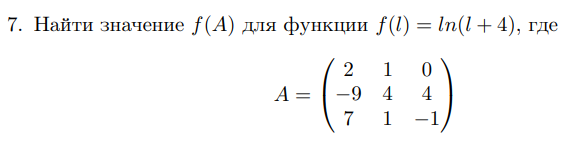

In [121]:
A = sympy.Matrix([
    [ 2, 1, 0 ],
    [ -9, 4, 4 ],
    [ 7, 1, -1 ]
])

Воспользуемся методом многочленов Лагранжа-Сильвестра. Так как матрица $A$ размера 3, существует многочлен $r(x) = ax^2 + bx + c$ такой, что $f(A) = r(x)$. \
Для нахождения $r(x)$ определим собственные значения матрицы $A$.

In [122]:
A.eigenvals()

{3: 1, 1: 2}

Таким образом, матрица $A$ имеет собственное значение $3$ кратности 1 и собственное значение $1$ кратности 2. Следовательно, $r(x)$ задаётся следующими условиями:
$$
\begin{cases}
    r(1) = f(1) \\
    r'(1) = f'(1) \\
    r(3) = f(3) 
\end{cases}
\Leftrightarrow
\begin{cases}
    a \cdot 1^2 + b \cdot 1 + c = ln(1 + 4) \\
    (2ax + b)(1) = (\dfrac{1}{x + 4})(1) \\
    a \cdot 3^2 + b \cdot 3 + c = ln(3 + 4) \\
\end{cases}
\Leftrightarrow
\begin{cases}
    a + b + c = ln(5) \\
    2a \cdot 1 + b = \dfrac{1}{1 + 4} \\
    9a + 3b + c = ln(7) \\
\end{cases}
\Leftrightarrow
\begin{cases}
    a + b + c = ln(5) \\
    2a + b = \dfrac{1}{5} \\
    9a + 3b + c = ln(7) \\
\end{cases}
\Leftrightarrow
\begin{pmatrix}
    1 & 1 & 1 \\
    2 & 1 & 0 \\
    9 & 3 & 1
\end{pmatrix}
\begin{pmatrix} a \\ b \\ c \end{pmatrix}
=
\begin{pmatrix} ln(5) \\ 0.2 \\ ln(7) \end{pmatrix}
\Leftrightarrow
\begin{pmatrix} a \\ b \\ c \end{pmatrix} = 
\begin{pmatrix}
    1 & 1 & 1 \\
    2 & 1 & 0 \\
    9 & 3 & 1
\end{pmatrix}^{-1}
\begin{pmatrix} ln(5) \\ 0.2 \\ ln(7) \end{pmatrix}
$$

In [123]:
a, b, c = sympy.Matrix([ [ 1, 1, 1 ], [ 2, 1, 0 ], [ 9, 3, 1 ] ]).inv() @ sympy.Matrix([ sympy.log(5), 1 / sympy.S(5), sympy.log(7) ])
display(a, b, c)

-log(5)/4 - 1/10 + log(7)/4

-log(7)/2 + 2/5 + log(5)/2

-3/10 + log(7)/4 + 3*log(5)/4

In [124]:
(a * (A @ A) + b * A + c * sympy.eye(3)).evalf()

Matrix([
[ 1.93649343919167,  0.136472236621213, -0.0635277633787871],
[-1.67294447324243,   2.14591014905531,   0.736472236621213],
[ 1.65411105351515, 0.0729444732424259,    1.08238238567653]])